## Notebook for experimenting with BruteForce algorithm

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from statistics import mean
import os

%matplotlib inline 
matplotlib.style.use('ggplot')

In [2]:
def parseParamsFromName(fileName):
    split = fileName.split("_")
    if len(split) is not 5:
        raise ValueError('Unexpected fileName: ' + fileName)
        
    return int(split[1]), int(split[2]), int(split[3]), int(split[4])

In [3]:
def prepareDFCols(dirName, fileName):
    file_df = pd.read_csv(dirName + fileName)
    
    n, k, w, id = parseParamsFromName(fileName[:-10])
    
    file_df = file_df.assign(n=n)
    file_df = file_df.assign(k=k)
    file_df = file_df.assign(w=w)
    file_df = file_df.assign(id=id)
    
    return file_df

In [4]:
# load data from folder, create important columns and concat all files into 1 df
def loadDF(dirName):
    df = None
    
    for fileName in os.listdir(dirName):
        if df is None:
            df = prepareDFCols(dirName, fileName)
        else:
            df = pd.concat([df, prepareDFCols(dirName, fileName)], ignore_index=True)

    return df

In [5]:
params_w = [50, 500, 1000, 1500, 2000]
params_k = [80, 200, 500, 1000, 1500]
params_n = [20, 80, 160, 240]

In [6]:
FOLDER_NAME = './Output/SimulatedAnnealing/'
# ziskani pozadovanych dat
df_weight = loadDF(FOLDER_NAME + 'WeightTest/')
df_clauses = loadDF(FOLDER_NAME + 'ClausesTest/')
df_var = loadDF(FOLDER_NAME + 'VarTest/')

display(df_weight.head(2))
display(df_clauses.head(2))
display(df_var.head(2))

,FormulaId,NumberOfClauses,CpuTime,RelativeError,n,k,w,id
0,1000_1,20,0.015625,0.0,20,80,1000,1
1,1000_10,20,0.046875,0.0,20,80,1000,10


,FormulaId,NumberOfClauses,CpuTime,RelativeError,n,k,w,id
0,0_200_1,20,0.421875,0.0,20,1000,200,1
1,0_200_10,20,0.343750,0.0,20,1000,200,10


,FormulaId,NumberOfClauses,CpuTime,RelativeError,n,k,w,id
0,0_500_1,160,3.25,0.0,160,400,500,1
1,0_500_10,160,5.00,0.0,160,400,500,10


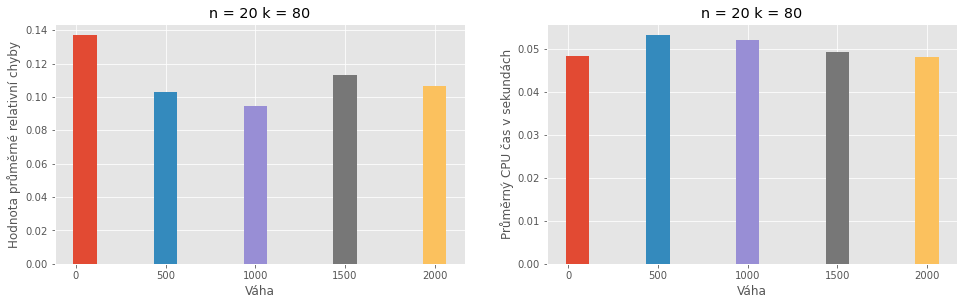

In [7]:
# weight test
i = 331
plt.figure(figsize=(25,15))
columnName = 'RelativeError'
plt.subplot(i)
for w in params_w:
    plt.bar(
            w,
            df_weight[(df_weight['w'] == w) & (df_weight['k'] == 80)
                & (df_weight['n'] == 20)
            ][columnName].mean(),
            width = 130
    )
    plt.title("n = 20 k = 80")
    plt.xlabel('Váha')
    plt.ylabel('Hodnota průměrné relativní chyby')

i += 1

columnName = 'CpuTime'
plt.subplot(i)
for w in params_w:
    plt.bar(
            w,
            df_weight[(df_weight['w'] == w) & (df_weight['k'] == 80)
                & (df_weight['n'] == 20)
            ][columnName].mean(),
            width = 130
    )
    plt.title("n = 20 k = 80")
    plt.xlabel('Váha')
    plt.ylabel('Průměrný CPU čas v sekundách')

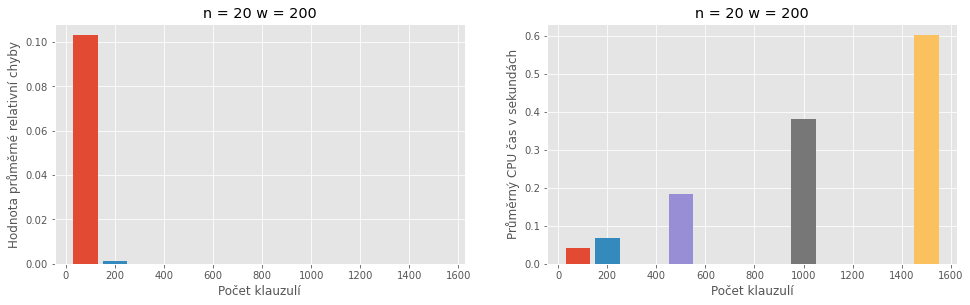

In [8]:
# clauses test
i = 331
plt.figure(figsize=(25,15))
columnName = 'RelativeError'
plt.subplot(i)
for k in params_k:
    plt.bar(
            k,
            df_clauses[(df_clauses['w'] == 200) & (df_clauses['k'] == k)
                & (df_clauses['n'] == 20)
            ][columnName].mean(),
            width = 100
    )
    plt.title("n = 20 w = 200")
    plt.xlabel('Počet klauzulí')
    plt.ylabel('Hodnota průměrné relativní chyby')

i += 1

columnName = 'CpuTime'
plt.subplot(i)
for k in params_k:
    plt.bar(
            k,
            df_clauses[(df_clauses['w'] == 200) & (df_clauses['k'] == k)
                & (df_clauses['n'] == 20)
            ][columnName].mean(),
            width = 100
    )
    plt.title("n = 20 w = 200")
    plt.xlabel('Počet klauzulí')
    plt.ylabel('Průměrný CPU čas v sekundách')

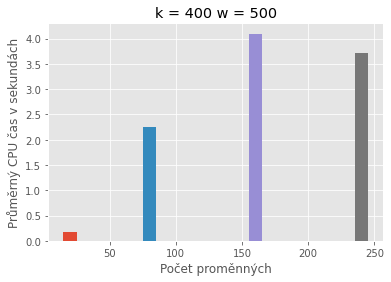

In [9]:
# variable count test
columnName = 'CpuTime'
for n in params_n:
    plt.bar(
            n,
            df_var[(df_var['w'] == 500) & (df_var['k'] == 400)
                & (df_var['n'] == n)
            ][columnName].mean(),
            width = 10
    )
    plt.title("k = 400 w = 500")
    plt.xlabel('Počet proměnných')
    plt.ylabel('Průměrný CPU čas v sekundách')